<a href="https://colab.research.google.com/github/GIHYEON-KIM/Used_car_price_prediction/blob/main/used_car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 절차

1) 데이터 선정 이유 및 문제 정의

2) 데이터를 이용한 가설 및 평가지표, 베이스라인 선택


**태스크를 수행한 후, 다음 질문에 대답할 수 있어야 합니다.**
- 해당 특성을 target으로 지정한 이유를 설명하세요

- 해당 베이스라인 모델과 평가지표를 선택한 이유를 설명하세요

3) EDA와 데이터 전처리

**태스크를 수행한 후, 다음 질문에 대답할 수 있어야 합니다**

- Data Leakage가 있었나요? 없었다면 어떻게 방지했나요?

- 만들고자 하는 모델은 언제 유용한가요? 어떤 한계를 가지고 있나요?


4) 머신러닝 방식 적용 및 교차검증

**태스크를 수행한 후, 다음 질문에 대답할 수 있어야 합니다.**

- 모델을 학습한 후에 베이스라인보다 잘 나왔나요? 그렇지 않다면 그 이유는 무엇일까요?
- 모델 성능 개선을 위해 어떤 방법을 적용했나요? 그 방법을 선택한 이유는 무엇인가요?
- 최종 모델에 관해 설명하세요.

5) 머신러닝 모델 해석

- PDP, SHAP을 활용하여 최종 모델을 설명합니다
- 시각화는 "설명"이 제일 중요합니다. (비데이터 직군도 이해하도록)

**태스크를 수행한 후, 다음 질문에 대답할 수 있어야 합니다.**

- 모델이 관측치를 예측하기 위해서 어떤 특성을 활용했나요?
- 어떤 특성이 있다면 모델의 예측에 도움이 될까요? 해당 특성은 어떻게 구할 수 있을까요?

### 1) 시나리오 (데이터 선택)

- 바가지 이슈가 많은 중고차 시장에서, 구매자들을 위해 적절한 중고차 가격의 기준이 나오는 중고차 거래 플랫폼을 개발중
- 더불어, 판매자 또한 얼마 정도에 팔아야 할 지 시세를 모를 수 있다.
- 따라서 중고차 가격을 예측하는 회귀 문제를 풀기로 결정

dataset : [캐글 중고차 데이터](https://www.kaggle.com/austinreese/craigslist-carstrucks-data)

**특성 설명**

- region : craigslist 지역 (craigslist는 플랫폼 이름임)
- price : 판매 가격
- year : 년식
- manufacturer : 제조사
- model : 모델
- condition : 상태
- cylinders : 실린더 수 (기통)
- fuel : 연료 타입
- odometer : 주행거리(mile)
- title_status : title status of vehicle
- transmission : 변속기 타입
- drive : 구동 방식(전륜 등)
- size : 차량 사이즈
- type : 차량 타입(SUV 등)
- paint_color : 색상
- state : 주
- lat : latitude of listing
- long : longitude of listing
- posting_date : 포스팅 날짜
- VIN : 차량 등록 번호
- description : 부가 설명

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('./data/vehicles.csv')
df.head(3)

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    458213 non-null  int64  
 1   id            458213 non-null  int64  
 2   url           458213 non-null  object 
 3   region        458213 non-null  object 
 4   region_url    458213 non-null  object 
 5   price         458213 non-null  int64  
 6   year          457163 non-null  float64
 7   manufacturer  439993 non-null  object 
 8   model         453367 non-null  object 
 9   condition     265273 non-null  object 
 10  cylinders     287073 non-null  object 
 11  fuel          454976 non-null  object 
 12  odometer      402910 non-null  float64
 13  title_status  455636 non-null  object 
 14  transmission  455771 non-null  object 
 15  VIN           270664 non-null  object 
 16  drive         324025 non-null  object 
 17  size          136865 non-null  object 
 18  type

In [ ]:
df.isnull().sum()

Unnamed: 0           0
id                   0
url                  0
region               0
region_url           0
price                0
year              1050
manufacturer     18220
model             4846
condition       192940
cylinders       171140
fuel              3237
odometer         55303
title_status      2577
transmission      2442
VIN             187549
drive           134188
size            321348
type            112738
paint_color     140843
image_url           28
description         70
state                0
lat               7448
long              7448
posting_date        28
dtype: int64

In [ ]:
df.shape

(458213, 26)

- 결측치가 30%가 넘는 것들은 사용하지 않기로 하자.

In [ ]:
140840/458213

0.30736797079087674

-> condition, cylinders, paint_color, size 사용하지 않기

In [ ]:
target = 'price'

#### 타겟의 분포

In [ ]:
df['price'].value_counts()

0        33753
6995      4003
5995      3760
7995      3701
3500      3680
         ...  
29577        1
13185        1
15232        1
33431        1
12422        1
Name: price, Length: 16924, dtype: int64

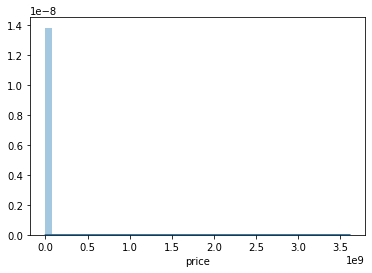

In [ ]:
sns.distplot(df['price'])

- target 값이 차이가 너무 많이나서 분포가 보이지 않는다.

In [ ]:
df[target].describe()

count    4.582130e+05
mean     4.042093e+04
std      8.194599e+06
min      0.000000e+00
25%      4.900000e+03
50%      1.099500e+04
75%      2.149500e+04
max      3.615215e+09
Name: price, dtype: float64

- 판매를 0원에 하진 않을 것 같다.
- (0달러인 것을 모두 이상치의 영향을 덜 받는 중앙값으로 처리해주자)

#### 여기서부터 copy (데이터 수가 많아서 불러오는데 시간이 걸림)

In [ ]:
df_c = df.copy()

In [ ]:
df_c = df_c.drop(['Unnamed: 0', 'id', 'url', 'region_url','image_url','VIN', 'description'], axis = 1)

- 우선적으로 불필요한 feature 제거

#### 가격 이상치 처리

- 가격들을 보다보니 123456, 123456789 등 이런식으로 장난 쳐놓은 가격들이 있었다. 따라서 이런 가격들은 모두 drop 해주자.
- 그리고 가격이 너무 비싼 차들도 실제로 검색해보면 새 차의 가격이 그정도가 아닌 것들도 많으므로 drop 시켜주자.
- 가격이 너무 싼 차들(0, 1, 2 ... 등)도 이상하므로 어느정도 이상 가격인 차들만 보기로 하자.

In [ ]:
df_c = df_c[df_c[target] < 300000]
df_c = df_c[df_c[target] > 400]

In [ ]:
df_c = df_c[df_c[target] != 123456]
df_c = df_c[df_c[target] != 12345]
df_c = df_c[df_c[target] != 1234]

88888 처럼 같은 숫자의 연속인 price 값들도 장난처럼 보이므로 제거해야겠다고 판단됨.

In [ ]:
df_c[df_c[target] == 88888]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date
53579,san diego,88888,2010.0,ferrari,california,NaN,8 cylinders,gas,25310.0,clean,automatic,rwd,NaN,convertible,black,ca,32.991085,-117.197375,2020-12-02T11:18:37-0800
236995,charlotte,88888,2008.0,toyota,NaN,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,nc,35.901000,-81.212400,2020-11-22T09:08:45-0500


In [ ]:
def dropsamenum(x):
    cnt = 0
    for i in range(1,len(str(x))):
        if str(x)[i] == str(x)[i-1]:
            cnt += 1
    if cnt >= 3 :
        return 0
    else:
        return x

In [ ]:
df_c[target] = df_c[target].apply(dropsamenum)

In [ ]:
df_c = df_c[df_c[target] != 0]

In [ ]:
df_c.shape

(405359, 19)

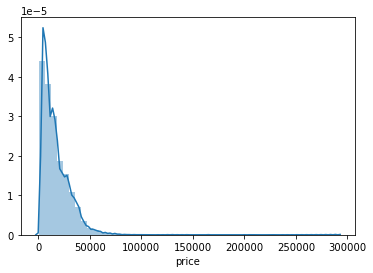

In [ ]:
sns.distplot(df_c['price'])

- skewed to the right 분포를 띄고있다.

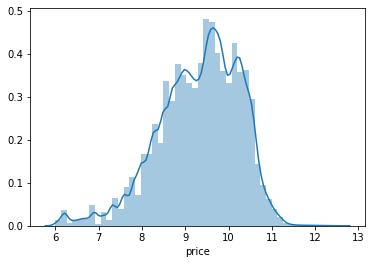

In [ ]:
sns.distplot(np.log(df_c[target]))

- log를 씌운 target 값의 분포를 보면 정규분포와 가까운 형태를 보인다.
- 이것을 나중에 모델을 만들 때 사용해보자.

### 2) 훈련/검증/테스트 데이터 나누기

데이터의 양이 많으므로 hold-out 방법을 써도 괜찮을 것 같다.

예측값에 영향을 줄 수 있으므로 미리 데이터 셋을 나눠놓고 feature engineering을 진행하기로 하자.

- 훈련/검증/테스트 데이터를 무작위로 나눠주기로 함.
- 데이터의 양은 약 45만 개 정도로 많은 편이므로 부담이 없다.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_dl = df.copy()

#### train / val 합친 데이터

In [ ]:
train_val, test = train_test_split(df_dl, train_size = 0.8, random_state = 42)
train_val.shape, test.shape

((366570, 26), (91643, 26))

#### train / val 분리 데이터 (홀드아웃 검증을 위한)

In [ ]:
train, val = train_test_split(train_val, train_size = 0.8, random_state = 42)
train.shape, val.shape, test.shape

((293256, 26), (73314, 26), (91643, 26))

### 3) 데이터를 전처리

#### train / val 합친 데이터

In [ ]:
train_val = train_val[(train_val[target] < 300000) & (train_val[target] > 400)]
train_val = train_val[train_val[target] != 123456]
train_val = train_val[train_val[target] != 12345]
train_val = train_val[train_val[target] != 1234]

In [ ]:
train_val[target] = train_val[target].apply(dropsamenum)
train_val = train_val[train_val[target] != 0]

In [ ]:
train_val.shape

(324278, 26)

In [ ]:
train_val[target].describe()

count    324278.000000
mean      16122.812679
std       13572.026547
min         401.000000
25%        5999.000000
50%       12676.500000
75%       22990.000000
max      289950.000000
Name: price, dtype: float64

#### train / val 분리 데이터 (홀드아웃 검증을 위한)

In [ ]:
train = train[(train[target] < 300000) & (train[target] > 400)]
train = train[train[target] != 123456]
train = train[train[target] != 12345]
train = train[train[target] != 1234]

In [ ]:
train[target] = train[target].apply(dropsamenum)
train = train[train[target] != 0]

In [ ]:
train.shape

(259348, 26)

#### Base line 모델 평가
- val 데이터셋의 평균값으로 MAE와 RMSE 성능 평가

In [ ]:
base_pred = val[target].mean()
base_pred

96686.96051231689

In [ ]:
val['base_pred'] = base_pred
base_pred = val['base_pred']
val = val.drop('base_pred', axis = 1)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('Base Line의 MAE : ', mean_absolute_error(val[target], base_pred))
print('Base Line의 RMSE : ', np.sqrt(mean_squared_error(val[target], base_pred)))

Base Line의 MAE :  163794.33357387394
Base Line의 RMSE :  14811158.262336215


In [ ]:
base_test_pred = test[target].mean()
base_test_pred

61216.67077020975

In [ ]:
test['base_test_pred'] = base_test_pred
base_test_pred = test['base_test_pred']
test = test.drop('base_test_pred', axis = 1)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('Base Line의 MAE : ', mean_absolute_error(test[target], base_test_pred))
print('Base Line의 RMSE : ', np.sqrt(mean_squared_error(test[target], base_test_pred)))

Base Line의 MAE :  94408.62351514935
Base Line의 RMSE :  12658581.657419719


#### 필요 없는 컬럼 제거

In [ ]:
train = train.drop(['Unnamed: 0', 'id', 'url', 'region_url','image_url','VIN', 'description'], axis = 1)
train_val = train_val.drop(['Unnamed: 0', 'id', 'url', 'region_url','image_url','VIN', 'description'], axis = 1)
val = val.drop(['Unnamed: 0', 'id', 'url', 'region_url','image_url','VIN', 'description'], axis = 1)
test = test.drop(['Unnamed: 0', 'id', 'url', 'region_url','image_url','VIN', 'description'], axis = 1)
train.head(3)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date
149707,muncie / anderson,3495,2009.0,chevrolet,cobalt,good,4 cylinders,gas,NaN,clean,automatic,fwd,NaN,NaN,NaN,in,40.295212,-84.97530,2020-11-07T09:12:13-0500
139271,rockford,8495,2013.0,hyundai,santa fe,NaN,4 cylinders,gas,80652.0,clean,automatic,fwd,NaN,NaN,NaN,il,42.230800,-88.33240,2020-11-28T14:45:31-0600
7482,anchorage / mat-su,21995,2011.0,ford,f-150,NaN,NaN,gas,162941.0,clean,automatic,4wd,NaN,pickup,white,ak,61.161670,-149.86312,2020-11-18T14:03:39-0900


#### 가설 | (posting_date - year) -> age 처리
- 차량이 오래될 수록 가격이 떨어질 것이다.
- 차량 판매 글을 올린 시점에 차량이 얼마나 오래 됐는지 알아보기 위한 engineering
- 결측치는 최다빈도 날짜로 채우기로 결정

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
train['posting_date'] = train['posting_date'].fillna('2020-11')
train_val['posting_date'] = train_val['posting_date'].fillna('2020-11')
val['posting_date'] = val['posting_date'].fillna('2020-11')
test['posting_date'] = test['posting_date'].fillna('2020-11')

In [ ]:
train['year'] = train['year'].fillna(2017)
train_val['year'] = train_val['year'].fillna(2017)
val['year'] = val['year'].fillna(2017)
test['year'] = test['year'].fillna(2017)

In [ ]:
def post_date_split(x):
    res = x.split('-')[0]
    return int(res)

In [ ]:
train['posting_date'] = train['posting_date'].apply(post_date_split)
train['age'] = train['posting_date'] - train['year']

train_val['posting_date'] = train_val['posting_date'].apply(post_date_split)
train_val['age'] = train_val['posting_date'] - train_val['year']

test['posting_date'] = test['posting_date'].apply(post_date_split)
test['age'] = test['posting_date'] - test['year']

val['posting_date'] = val['posting_date'].apply(post_date_split)
val['age'] = val['posting_date'] - val['year']

In [ ]:
train.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date,age
149707,muncie / anderson,3495,2009.0,chevrolet,cobalt,good,4 cylinders,gas,NaN,clean,automatic,fwd,NaN,NaN,NaN,in,40.295212,-84.97530,2020,11.0
139271,rockford,8495,2013.0,hyundai,santa fe,NaN,4 cylinders,gas,80652.0,clean,automatic,fwd,NaN,NaN,NaN,il,42.230800,-88.33240,2020,7.0
7482,anchorage / mat-su,21995,2011.0,ford,f-150,NaN,NaN,gas,162941.0,clean,automatic,4wd,NaN,pickup,white,ak,61.161670,-149.86312,2020,9.0
181220,baltimore,9990,2012.0,fiat,500 500c lounge convertible,good,NaN,gas,48412.0,clean,other,fwd,NaN,convertible,silver,md,39.300000,-76.61000,2020,8.0
146185,indianapolis,8995,2004.0,lexus,rx 330,NaN,NaN,gas,175461.0,clean,automatic,NaN,NaN,NaN,NaN,in,39.792954,-86.06479,2020,16.0


In [ ]:
train = train[train['age']>=0]
train_val = train_val[train_val['age']>=0]
val = val[val['age']>=0]
test = test[test['age']>=0]

In [ ]:
train.corr()

,price,year,odometer,lat,long,posting_date,age
price,1.000000,0.350620,-0.007783,-0.015023,-0.081966,NaN,-0.350620
year,0.350620,1.000000,-0.008909,0.005879,-0.017345,NaN,-1.000000
odometer,-0.007783,-0.008909,1.000000,-0.002232,-0.000857,NaN,0.008909
lat,-0.015023,0.005879,-0.002232,1.000000,-0.120654,NaN,-0.005879
long,-0.081966,-0.017345,-0.000857,-0.120654,1.000000,NaN,0.017345
posting_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,-0.350620,-1.000000,0.008909,-0.005879,0.017345,NaN,1.000000


In [ ]:
train = train.drop(['year', 'posting_date'], axis = 1)
val = val.drop(['year', 'posting_date'], axis = 1)
train_val = train_val.drop(['year', 'posting_date'], axis = 1)
test = test.drop(['year', 'posting_date'], axis = 1)

In [ ]:
train.shape

(258954, 18)

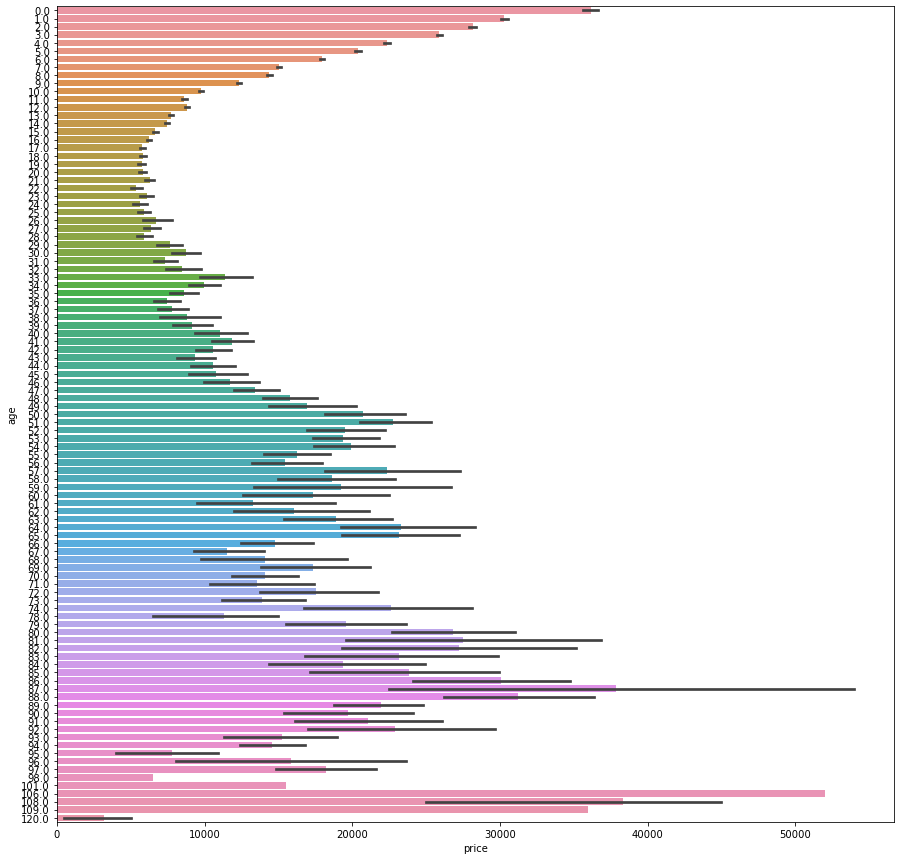

In [ ]:
plt.figure(figsize = (15,15))
sns.barplot(data = train, y = 'age', x = 'price', orient='h')

- 예상했던대로, 차량 age가 늘어날 수록 가격이 떨어졌다.
- 하지만, 26년 이상 된 차량에 대해서는 age가 늘어날 수록 가격이 조금씩 늘어나는 경향을 보였다.

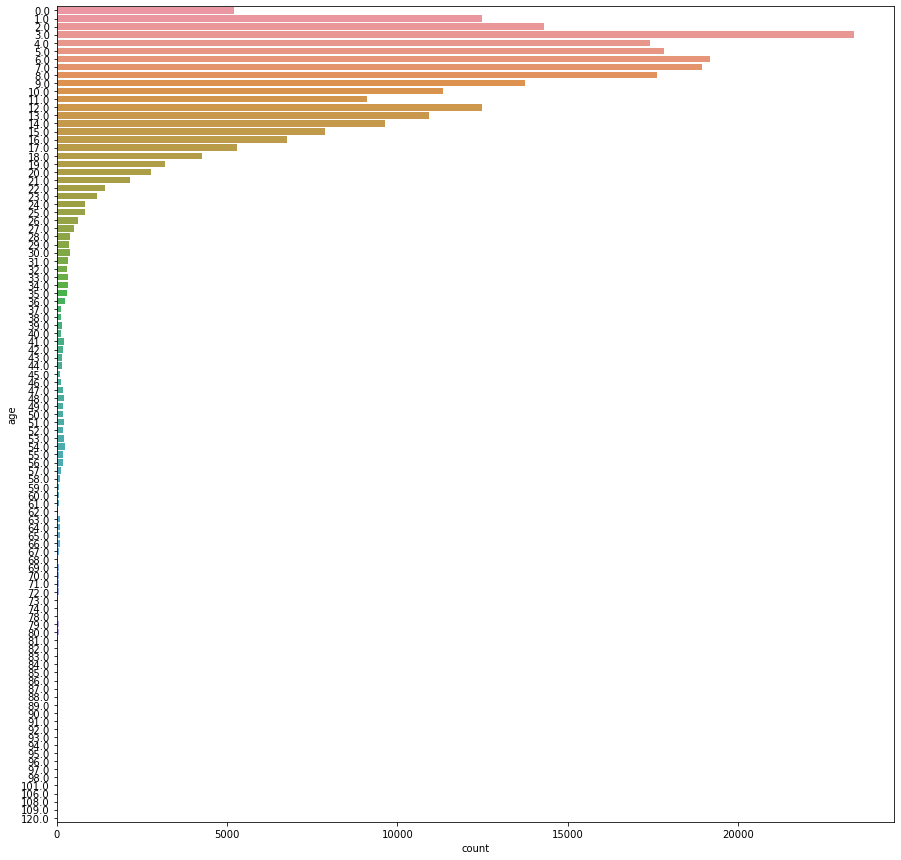

In [ ]:
plt.figure(figsize = (15,15))
sns.countplot(y = 'age', data = train)

- 차량 년식이 너무 오래된 것은 이상하다고 판단되어서 개수를 확인해보니 너무 적어서 이상치를 유발시킬 수 있는 것 같다.
- 따라서 age가 24년 이하인 차량만 사용하기로 결정했다.

In [ ]:
train = train[train['age'] <= 24]
test = test[test['age'] <= 24]
val = val[val['age'] <= 24]
train_val = train_val[train_val['age'] <= 24]

In [ ]:
bins = [-1, 3, 6, 9, 12, 15, 18, 21, 24]
labels = ['0~3', '4~6', '7~9', '10~12', '13~15', '16~18', '19~21',  '22~24']

train['age_bins'] = pd.cut(train['age'], bins = bins, labels=labels)
train_val['age_bins'] = pd.cut(train_val['age'], bins = bins, labels=labels)
val['age_bins'] = pd.cut(val['age'], bins = bins, labels=labels)
test['age_bins'] = pd.cut(test['age'], bins = bins, labels=labels)

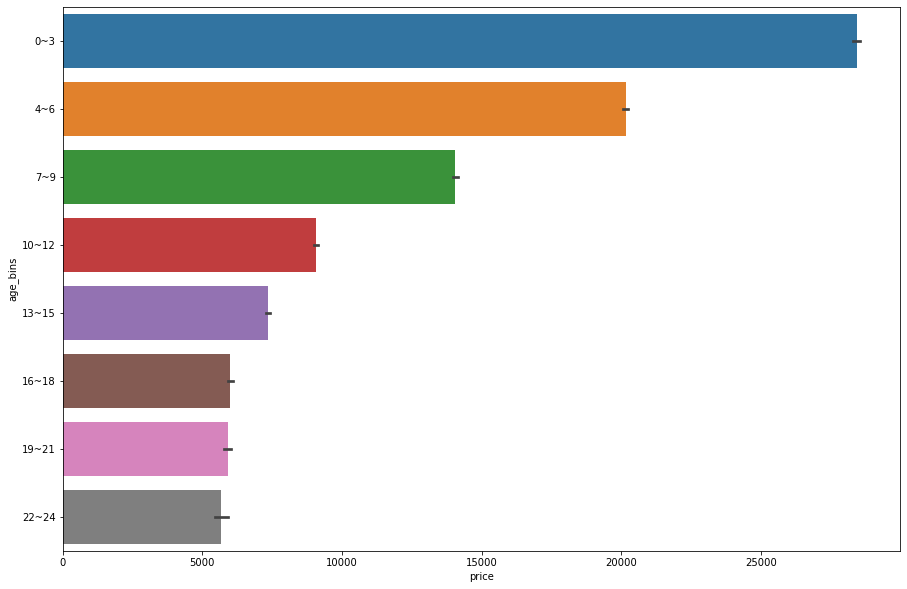

In [ ]:
plt.figure(figsize = (15,10))
sns.barplot(data = train, y = 'age_bins', x = 'price', orient='h')

##### age drop / age_bins drop / age_bins to int

In [ ]:
# train['age_bins'] = train['age_bins'].astype('int64')
# test['age_bins'] = test['age_bins'].astype('int64')
# val['age_bins'] = val['age_bins'].astype('int64')
# train_val['age_bins'] = train_val['age_bins'].astype('int64')

In [ ]:
# train = train.drop('age', axis = 1)
# test = test.drop('age', axis = 1)
# val = val.drop('age', axis = 1)
# train_val = train_val.drop('age', axis = 1)

In [ ]:
train.corr()

,price,odometer,lat,long,age
price,1.000000,-0.007557,-0.014408,-0.086360,-0.568014
odometer,-0.007557,1.000000,-0.002213,-0.000742,0.012410
lat,-0.014408,-0.002213,1.000000,-0.120648,0.010867
long,-0.086360,-0.000742,-0.120648,1.000000,0.053478
age,-0.568014,0.012410,0.010867,0.053478,1.000000


#### region

In [ ]:
len(train['region'].unique())

405

- 405개의 unique 데이터가 region feature를 이루고있다. (cardinarlity가 매우 높다.)
- 따라서 drop 하는 것이 좋을 것이라고 생각함.
- 지역에 따라 차 가격이 달라지진 않을 것 같다.

In [ ]:
train = train.drop('region', axis = 1)
train_val = train_val.drop('region', axis = 1)
val = val.drop('region', axis = 1)
test = test.drop('region', axis = 1)

#### Cylinders (결측치 30% 이상)
- 일반적으로 기통이 높을 수록 차가 잘 나가고 소비자들의 만족도가 높다.
- 따라서 기통이 높아질 수록 가격이 높을 것이다.

In [ ]:
train['cylinders'].isnull().sum()

90399

In [ ]:
# train['cylinders'] = train['cylinders'].fillna('6 cylinders')
# train_val['cylinders'] = train_val['cylinders'].fillna('6 cylinders')
# val['cylinders'] = val['cylinders'].fillna('6 cylinders')
# test['cylinders'] = test['cylinders'].fillna('6 cylinders')

In [ ]:
def cylinder(x):
    if '3' in x:
        return 3
    elif '4' in x:
        return 4
    elif '5' in x:
        return 5
    elif '6' in x:
        return 6
    elif '8' in x:
        return 8
    elif '10' in x:
        return 10
    elif '12' in x:
        return 12
    else:
        return x

In [ ]:
train2 = train.copy()

In [ ]:
train2['cylinders'] = train2['cylinders'].fillna('6 cylinders')
train2['cylinders'] = train2['cylinders'].apply(cylinder)

In [ ]:
train2[train2['cylinders'] == 'other']

,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,age,age_bins
256734,32900,tesla,s p85,excellent,other,electric,76584.0,clean,automatic,rwd,full-size,sedan,red,nj,40.334985,-74.488436,7.0,7~9
32508,539,chevrolet,silverado 2500hd ltz,NaN,other,diesel,83304.0,NaN,automatic,4wd,NaN,NaN,NaN,ca,34.070502,-117.427781,9.0,7~9
169361,3200,honda,shadow,excellent,other,gas,15000.0,clean,manual,NaN,NaN,NaN,purple,ky,38.145700,-85.864100,18.0,16~18
43699,42999,tesla,model 3 t autopilot mid,excellent,other,gas,7000.0,clean,automatic,NaN,NaN,sedan,NaN,ca,33.741517,-116.356860,2.0,0~3
195932,5400,mazda,rx-8,good,other,gas,105000.0,clean,manual,rwd,NaN,coupe,blue,mi,42.397829,-83.315592,15.0,13~15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409720,27999,subaru,wrx,NaN,other,gas,45583.0,clean,manual,4wd,NaN,sedan,red,wa,47.199100,-122.315100,5.0,4~6
55856,17295,toyota,tacoma prerunner v6,NaN,other,gas,106866.0,clean,automatic,rwd,NaN,NaN,NaN,ca,33.189699,-117.226867,13.0,13~15
44510,2900,NaN,wester 2 seats,excellent,other,electric,500.0,clean,automatic,NaN,sub-compact,coupe,silver,ca,33.764400,-116.339800,1.0,0~3
44396,15990,ford,f-150 xl,NaN,other,other,108590.0,clean,automatic,NaN,NaN,other,white,ca,34.047216,-118.344391,4.0,4~6


- 기통이 other로 표시된 것들을 보면, 전기차인 것도 있고, 바이크인 것도 있다.
- 이 부분에 대해서 바이크와 전기차는 아예 다른 종류로 판단되므로 이 항목은 drop 시키고, 향후 데이터를 수집할 때 보완해야 할 것으로 판단된다.

In [ ]:
train3 = train2[train2['cylinders'] != 'other']

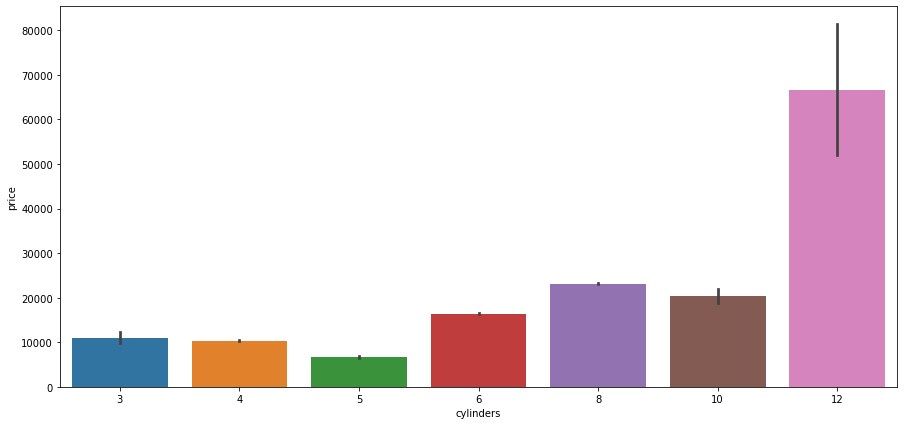

In [ ]:
plt.figure(figsize = (15, 7))
sns.barplot(data = train3, x = 'cylinders', y = 'price')

- cylinders의 수는 5기통까지는 갈 수록 가격이 떨어지다가, 6기통부터는 오르는 경향을 보인다.
- cylinders를 3 ~ 5기통 / 6 ~ 10기통 / 12기통으로 나눠서 생각해보면 어떨까?

In [ ]:
# # train['cylinders'] = train['cylinders'].fillna('6 cylinders')
# train['cylinders'] = train['cylinders'].apply(cylinder)

# # val['cylinders'] = val['cylinders'].fillna('6 cylinders')
# val['cylinders'] = val['cylinders'].apply(cylinder)

# # train_val['cylinders'] = train_val['cylinders'].fillna('6 cylinders')
# train_val['cylinders'] = train_val['cylinders'].apply(cylinder)

# # test['cylinders'] = test['cylinders'].fillna('6 cylinders')
# test['cylinders'] = test['cylinders'].apply(cylinder)

In [ ]:
# train = train[train['cylinders'] != 'other']
# val = val[val['cylinders'] != 'other']
# train_val = train_val[train_val['cylinders'] != 'other']
# test = test[test['cylinders'] != 'other']

In [ ]:
# train['cylinders'] = train['cylinders'].astype('int64')
# val['cylinders'] = val['cylinders'].astype('int64')
# test['cylinders'] = test['cylinders'].astype('int64')
# train_val['cylinders'] = train_val['cylinders'].astype('int64')

In [ ]:
# train.corr()

In [ ]:
def en_cylinder(x):
    if x <= 5:
        return 1
    elif x <= 10:
        return 2
    else:
        return 3

In [ ]:
# train['en_cylinders'] = train['cylinders'].apply(en_cylinder)
# test['en_cylinders'] = test['cylinders'].apply(en_cylinder)
# val['en_cylinders'] = val['cylinders'].apply(en_cylinder)
# train_val['en_cylinders'] = train_val['cylinders'].apply(en_cylinder)

#### condition (결측치 30% 이상)
- condition feature은 new, like new, excellent, good, fair, salvage 순으로 순서가 있는 항목이므로 ordinal encoding을 해주자.

In [ ]:
train.condition.value_counts()

good         67934
excellent    63867
like new     13749
fair          3770
new            641
salvage        299
Name: condition, dtype: int64

In [ ]:
# train['condition'] = train['condition'].fillna('good')
# val['condition'] = val['condition'].fillna('excellent')
# test['condition'] = test['condition'].fillna('good')
# train_val['condition'] = train_val['condition'].fillna('good')

In [ ]:
def en_condition(x):
    if "new" in x:
        return 6
    elif "like new" in x:
        return 5
    elif "excellent" in x:
        return 4
    elif "good" in x:
        return 3
    elif "fair" in x:
        return 2
    elif "salvage" in x:
        return 1

In [ ]:
# train['condition'] = train['condition'].apply(en_condition)
# val['condition'] = val['condition'].apply(en_condition)
# test['condition'] = test['condition'].apply(en_condition)
# train_val['condition'] = train_val['condition'].apply(en_condition)

#### title_status
- clean이면 1, 아니면 0으로 인코딩하겠다.

In [ ]:
train.title_status.value_counts()

clean         238961
rebuilt         5302
salvage         2499
lien            1167
missing          153
parts only        58
Name: title_status, dtype: int64

In [ ]:
train['title_status'] = train['title_status'].fillna('clean')
val['title_status'] = val['title_status'].fillna('clean')
test['title_status'] = test['title_status'].fillna('clean')
train_val['title_status'] = train_val['title_status'].fillna('clean')

In [ ]:
def en_title(x):
    if 'clean' in x:
        return 1
    else : 
        return 0

In [ ]:
train['en_title'] = train['title_status'].apply(en_title)
val['en_title'] = val['title_status'].apply(en_title)
test['en_title'] = test['title_status'].apply(en_title)
train_val['en_title'] = train_val['title_status'].apply(en_title)

In [ ]:
train

,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,age,age_bins,en_title
149707,3495,chevrolet,cobalt,good,4 cylinders,gas,NaN,clean,automatic,fwd,NaN,NaN,NaN,in,40.295212,-84.975300,11.0,10~12,1
139271,8495,hyundai,santa fe,NaN,4 cylinders,gas,80652.0,clean,automatic,fwd,NaN,NaN,NaN,il,42.230800,-88.332400,7.0,7~9,1
7482,21995,ford,f-150,NaN,NaN,gas,162941.0,clean,automatic,4wd,NaN,pickup,white,ak,61.161670,-149.863120,9.0,7~9,1
181220,9990,fiat,500 500c lounge convertible,good,NaN,gas,48412.0,clean,other,fwd,NaN,convertible,silver,md,39.300000,-76.610000,8.0,7~9,1
146185,8995,lexus,rx 330,NaN,NaN,gas,175461.0,clean,automatic,NaN,NaN,NaN,NaN,in,39.792954,-86.064790,16.0,16~18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252412,14999,chevrolet,silverado,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,nv,36.258000,-115.167000,14.0,13~15,1
126020,27995,ford,mustang,excellent,4 cylinders,gas,26959.0,clean,automatic,rwd,sub-compact,coupe,grey,id,43.862345,-116.499187,1.0,0~3,1
231468,13498,hyundai,elantra,NaN,4 cylinders,gas,35098.0,clean,automatic,fwd,NaN,sedan,NaN,mt,47.798900,-116.742300,3.0,0~3,1
56914,6900,kia,rio,NaN,NaN,gas,100812.0,clean,automatic,fwd,compact,sedan,white,ca,35.267013,-120.670023,12.0,10~12,1


#### state
- 일반적으로 차량은 시세가 정해져 있기 때문에 지역별로 가격이 차이가 나진 않을 것이다.

In [ ]:
df.state.unique()

array(['al', 'ak', 'az', 'ar', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga',
       'hi', 'id', 'il', 'in', 'ia', 'ks', 'ky', 'la', 'me', 'md', 'ma',
       'mi', 'mn', 'ms', 'mo', 'mt', 'nc', 'ne', 'nv', 'nj', 'nm', 'ny',
       'nh', 'nd', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx',
       'ut', 'vt', 'va', 'wa', 'wv', 'wi', 'wy'], dtype=object)

In [ ]:
train = train.drop('state', axis = 1)
train_val = train_val.drop('state', axis = 1)
test = test.drop('state', axis = 1)
val = val.drop('state', axis = 1)

#### manufacturer

In [ ]:
train['manufacturer'].unique()

array(['chevrolet', 'hyundai', 'ford', 'fiat', 'lexus', 'honda', 'bmw',
       'nissan', 'jeep', 'mercedes-benz', 'toyota', 'chrysler', 'ram',
       'cadillac', 'subaru', 'audi', 'buick', 'infiniti', nan, 'dodge',
       'alfa-romeo', 'mini', 'mazda', 'kia', 'gmc', 'acura', 'volkswagen',
       'porsche', 'mitsubishi', 'jaguar', 'lincoln', 'saturn', 'mercury',
       'pontiac', 'volvo', 'tesla', 'rover', 'ferrari', 'harley-davidson',
       'land rover', 'aston-martin', 'morgan'], dtype=object)

- 제조사들의 cardinality가 높으므로 제조사의 국가별로 알아보자

US - chevrolet, ford, jeep, chrysler, ram, cadillac, buick, dodge, gmc, jaguar, lincoln, saturn, mercury, pontiac, tesla, harley-davidson

Kor - hyundai, kia

Ita - fiat, alfa-romeo, ferrari

Jp - lexus, honda, nissan, toyota, subaru, infiniti, mazda, acura, mitsubishi, datsun

Ger - bmw, mercedes-benz, audi, mini, volkswagen, porsche

Swe - volvo

Uk - land rover, aston-martin, morgan

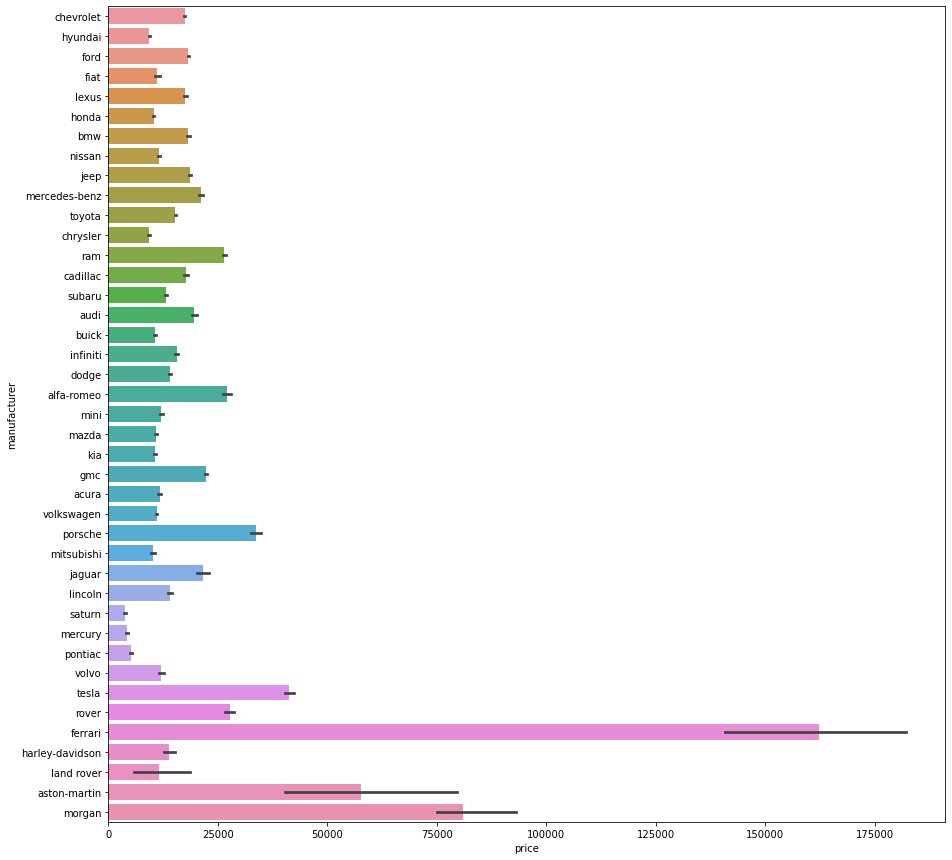

In [ ]:
plt.figure(figsize = (15,15))
sns.barplot(data = train, y = 'manufacturer', x = 'price', orient='h')

- ferrari가 압도적으로 비싸고, morgan, aston-martin, tesla, porsche 정도가 그 다음 가격대를 차지한다.

In [ ]:
train['manufacturer'] = train['manufacturer'].fillna('ford')
test['manufacturer'] = test['manufacturer'].fillna('ford')
val['manufacturer'] = val['manufacturer'].fillna('ford')
train_val['manufacturer'] = train_val['manufacturer'].fillna('ford')

In [ ]:
def en_manu(x):
    us = ['chevrolet', 'ford', 'jeep', 'chrysler', 'ram', 'cadillac', 'buick', 'dodge', 'gmc', 'jaguar', 'lincoln', 'saturn', 'mercury', 'pontiac', 'tesla', 'harley-davidson']
    kor = ['hyundai', 'kia']
    ita = ['fiat', 'alfa-romeo', 'ferrari']
    jp = ['lexus', 'honda', 'nissan', 'toyota', 'subaru', 'infiniti' ,'mazda', 'acura', 'mitsubishi', 'datsun']
    ger = ['bmw', 'mercedes-benz', 'audi', 'mini', 'volkswagen', 'porsche']
    swe = ['volvo']
    uk = ['rover', 'aston-martin', 'morgan']
    
    for i in us:
        if i in x:
            return 'us'
        
    for i in kor:
        if i in x:
            return 'kor'
        
    for i in ita:
        if i in x:
            return 'ita'
        
    for i in jp:
        if i in x:
            return 'jp'
        
    for i in ger:
        if i in x:
            return 'ger'
        
    for i in swe:
        if i in x:
            return 'swe'
        
    for i in uk:
        if i in x:
            return 'uk'

In [ ]:
train['en_manufacturer'] = train['manufacturer'].apply(en_manu)
test['en_manufacturer'] = test['manufacturer'].apply(en_manu)
val['en_manufacturer'] = val['manufacturer'].apply(en_manu)
train_val['en_manufacturer'] = train_val['manufacturer'].apply(en_manu)

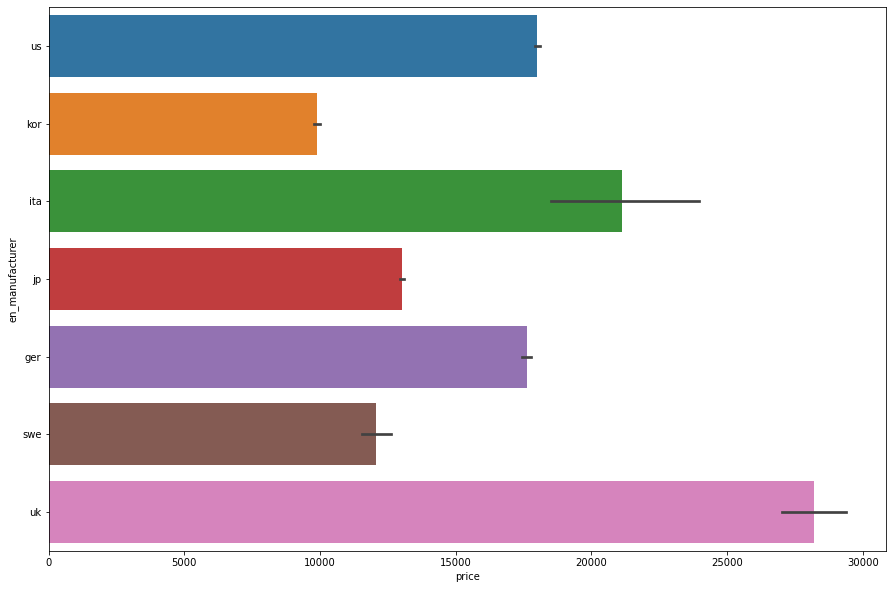

In [ ]:
plt.figure(figsize = (15,10))
sns.barplot(data = train, y = 'en_manufacturer', x = 'price', orient='h')

- manufacturer을 국가별로 나눴더니 성능이 더 떨어졌다.

#### transmission
- 자동변속기 : 1, 수동변속기 : 0으로 하고, other로 표시된 것은 어떤게 있는지 데이터 수집과정에서 보완이 필요해보인다.

In [ ]:
train['transmission'] = train['transmission'].fillna('automatic')
val['transmission'] = val['transmission'].fillna('automatic')
test['transmission'] = test['transmission'].fillna('automatic')
train_val['transmission'] = train_val['transmission'].fillna('automatic')

In [ ]:
def en_trans(x):
    if 'automatic' in x:
        return 1
    elif 'manual' in x:
        return 0

In [ ]:
train = train[train['transmission'] != 'other']
test = test[test['transmission'] != 'other']
val = val[val['transmission'] != 'other']
train_val = train_val[train_val['transmission'] != 'other']

In [ ]:
train['transmission'] = train['transmission'].apply(en_trans)
test['transmission'] = test['transmission'].apply(en_trans)
val['transmission'] = val['transmission'].apply(en_trans)
train_val['transmission'] = train_val['transmission'].apply(en_trans)

In [ ]:
train.transmission.value_counts()

1    217998
0     12207
Name: transmission, dtype: int64

#### drive

In [ ]:
val['drive'].value_counts()

4wd    20787
fwd    18283
rwd     7755
Name: drive, dtype: int64

In [ ]:
train['drive'] = train['drive'].fillna('4wd')
val['drive'] = val['drive'].fillna('4wd')
test['drive'] = test['drive'].fillna('4wd')
train_val['drive'] = train_val['drive'].fillna('4wd')

In [ ]:
val.drive.value_counts()

4wd    39525
fwd    18283
rwd     7755
Name: drive, dtype: int64

#### fuel

In [ ]:
train['fuel'].unique()

array(['gas', 'other', nan, 'diesel', 'hybrid', 'electric'], dtype=object)

In [ ]:
train['fuel'] = train['fuel'].fillna('gas')
val['fuel'] = val['fuel'].fillna('gas')
test['fuel'] = test['fuel'].fillna('gas')
train_val['fuel'] = train_val['fuel'].fillna('gas')

#### paint_color (결측치 30% 이상)

In [ ]:
train['paint_color'].unique()

array([nan, 'white', 'custom', 'red', 'grey', 'blue', 'black', 'silver',
       'green', 'brown', 'orange', 'purple', 'yellow'], dtype=object)

In [ ]:
train['paint_color'].value_counts()

white     41911
black     31789
silver    24469
grey      16575
blue      16360
red       15869
custom     4880
green      3751
brown      3162
yellow      880
orange      825
purple      413
Name: paint_color, dtype: int64

In [ ]:
# train['paint_color'] = train['paint_color'].fillna('white')
# test['paint_color'] = test['paint_color'].fillna('white')
# val['paint_color'] = val['paint_color'].fillna('white')
# train_val['paint_color'] = train_val['paint_color'].fillna('white')

In [ ]:
# train = train.drop('paint_color', axis = 1)
# test = test.drop('paint_color', axis = 1)
# val = val.drop('paint_color', axis = 1)
# train_val = train_val.drop('paint_color', axis = 1)

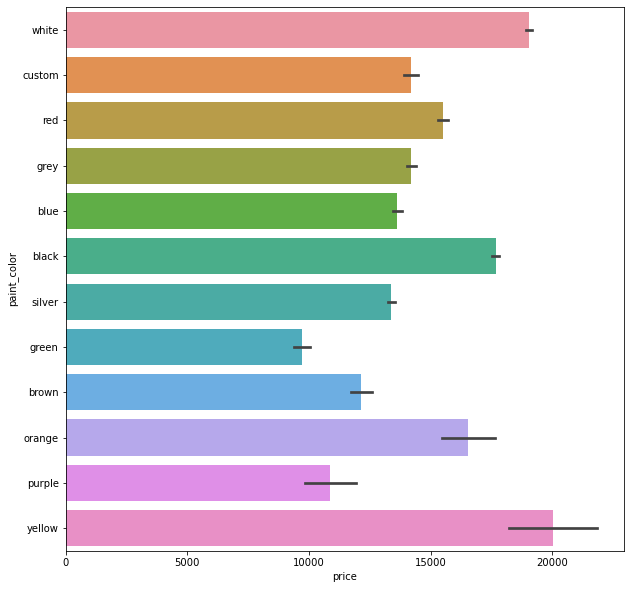

In [ ]:
plt.figure(figsize = (10, 10))
sns.barplot(data = train, y = 'paint_color', x = 'price', orient='h')

#### type

In [ ]:
train['type'].unique()

array([nan, 'pickup', 'truck', 'convertible', 'other', 'SUV', 'sedan',
       'coupe', 'hatchback', 'mini-van', 'wagon', 'van', 'bus', 'offroad'],
      dtype=object)

In [ ]:
train.type.value_counts()

sedan          48171
SUV            43211
pickup         19412
truck          17260
other           9168
hatchback       7990
coupe           7694
wagon           5831
van             5027
mini-van        3714
convertible     2954
bus              302
offroad          260
Name: type, dtype: int64

In [ ]:
train.shape

(230205, 19)

In [ ]:
train['type'] = train['type'].fillna('sedan')
test['type'] = test['type'].fillna('sedan')
val['type'] = val['type'].fillna('sedan')
train_val['type'] = train_val['type'].fillna('sedan')

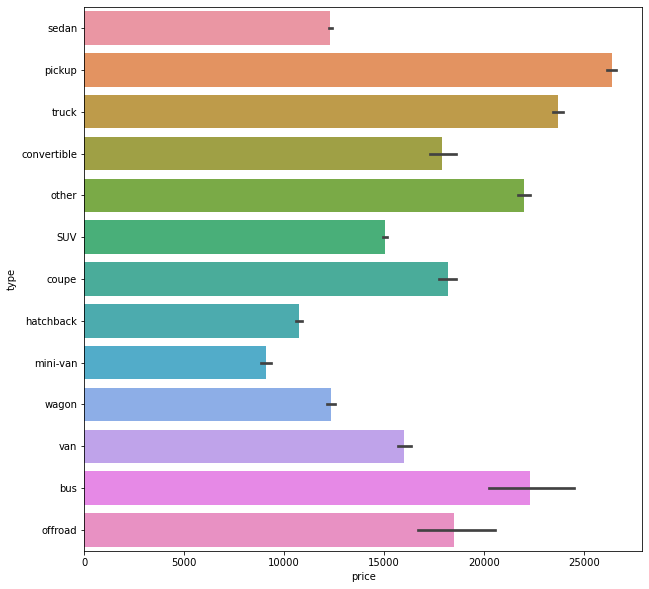

In [ ]:
plt.figure(figsize = (10, 10))
sns.barplot(data = train, y = 'type', x = 'price', orient='h')

In [ ]:
# train = train.drop('type', axis = 1)
# test = test.drop('type', axis = 1)
# val = val.drop('type', axis = 1)
# train_val = train_val.drop('type', axis = 1)

#### size (결측치 30% 이상)
- 결측치가 70%로 너무 많으므로 drop 시키기로 결정

In [ ]:
train = train.drop('size', axis = 1)
test = test.drop('size', axis = 1)
val = val.drop('size', axis = 1)
train_val = train_val.drop('size', axis = 1)

#### model (high cardinality)

- 모델도 너무 많으므로 drop (train 데이터셋에 22487개의 고유 모델이 존재한다.)
- 대신에 manufacturer로 어느정도 나눠볼 수 있지 않을까?

In [ ]:
len(train['model'].unique())

19592

In [ ]:
train.model.value_counts()

f-150                                               4280
silverado 1500                                      2863
camry                                               2208
1500                                                2151
accord                                              1991
                                                    ... 
escape se all wheel                                    1
CHEY TAHOE  Z71                                        1
Suzuki SX4 Hatchback 4D                                1
brz limited coupe only 37k low miles gps exhaust       1
corolla le 77k                                         1
Name: model, Length: 19591, dtype: int64

In [ ]:
train = train.drop('model', axis = 1)
test = test.drop('model', axis = 1)
val = val.drop('model', axis = 1)
train_val = train_val.drop('model', axis = 1)

#### odometer
- max value를 찾아보니 20억 mile 넘게 달린 자동차도 나온다. (32억 km)
- 이상치가 너무 크게 존재하므로 100만 km 미만 자동차만 생각.
- 다른 방법으로는, 통계적 방법(사분범위)으로 이상치 제거

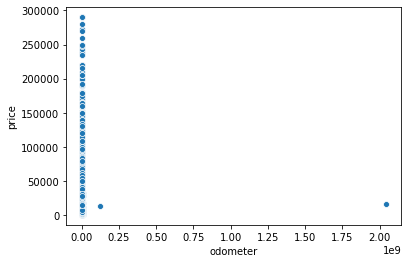

In [ ]:
sns.scatterplot(data = train, x = 'odometer', y = 'price')

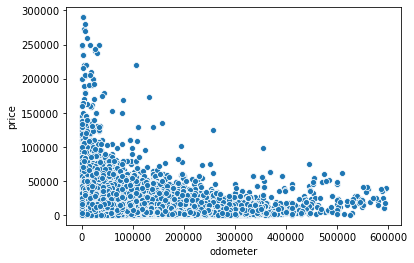

In [ ]:
train6 = train[train['odometer']<600000]
sns.scatterplot(data = train6, x = 'odometer', y = 'price')

In [ ]:
train.odometer.describe()

count    2.047640e+05
mean     1.135392e+05
std      4.526035e+06
min      0.000000e+00
25%      5.000000e+04
50%      9.701300e+04
75%      1.410000e+05
max      2.043756e+09
Name: odometer, dtype: float64

In [ ]:
q1 = 5.024450e+04
q3 = 1.418420e+05
IQR = q3 - q1

print("하방 limit : ", q1 - 1.5*IQR)
print("상방 limit : ", q3 + 1.5*IQR)

하방 limit :  -87151.75
상방 limit :  279238.25


- 상방 limit을 km로 환산해보면 449,390.402 km로, 중고차 주행거리의 max 범위로 설정해도 괜찮을 것 같다.

In [ ]:
train['odometer'] = train['odometer'].fillna(9.753000e+04)
val['odometer'] = val['odometer'].fillna(9.753000e+04)
test['odometer'] = test['odometer'].fillna(9.753000e+04)
train_val['odometer'] = train_val['odometer'].fillna(9.753000e+04)

In [ ]:
train = train[train['odometer']<600000]

#### long, lat
- drop

In [ ]:
train = train.drop(['long', 'lat'], axis = 1)
val = val.drop(['long', 'lat'], axis = 1)
test = test.drop(['long', 'lat'], axis = 1)
train_val = train_val.drop(['long', 'lat'], axis = 1)

In [ ]:
train.isnull().sum()

price                  0
manufacturer           0
condition          97163
cylinders          83056
fuel                   0
odometer               0
title_status           0
transmission           0
drive                  0
type                   0
paint_color        69213
age                    0
age_bins               0
en_title               0
en_manufacturer        0
dtype: int64

#### train, test data 처리

In [ ]:
train5 = train.copy()
val5 = val.copy()
test5 = test.copy()
train_val5 = train_val.copy()

In [ ]:
train5 = train5.dropna()
val5 = val5.dropna()
test5 = test5.dropna()
train_val5 = train_val5.dropna()

#### cylinders, condition, paint_color 처리

- cylinders

In [ ]:
train5['cylinders'] = train5['cylinders'].apply(cylinder)

val5['cylinders'] = val5['cylinders'].apply(cylinder)

train_val5['cylinders'] = train_val5['cylinders'].apply(cylinder)

test5['cylinders'] = test5['cylinders'].apply(cylinder)

In [ ]:
train5 = train5[train5['cylinders'] != 'other']
val5 = val5[val5['cylinders'] != 'other']
train_val5 = train_val5[train_val['cylinders'] != 'other']
test5 = test5[test5['cylinders'] != 'other']

<ipython-input-124-e0a6757c15ad>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_val5 = train_val5[train_val['cylinders'] != 'other']


In [ ]:
train5['cylinders'] = train5['cylinders'].astype('int64')
val5['cylinders'] = val5['cylinders'].astype('int64')
test5['cylinders'] = test5['cylinders'].astype('int64')
train_val5['cylinders'] = train_val5['cylinders'].astype('int64')

In [ ]:
train5['en_cylinders'] = train5['cylinders'].apply(en_cylinder)
test5['en_cylinders'] = test5['cylinders'].apply(en_cylinder)
val5['en_cylinders'] = val5['cylinders'].apply(en_cylinder)
train_val5['en_cylinders'] = train_val5['cylinders'].apply(en_cylinder)

- condition

In [ ]:
train5['condition'] = train5['condition'].apply(en_condition)
val5['condition'] = val5['condition'].apply(en_condition)
test5['condition'] = test5['condition'].apply(en_condition)
train_val5['condition'] = train_val5['condition'].apply(en_condition)

### 4) 평가지표

### 5) 모델 만들기

In [ ]:
y_train = train5[target]
x_train = train5.drop(target, axis = 1)
y_val = val5[target]
x_val = val5.drop(target, axis = 1)
y_test = test5[target]
x_test = test5.drop(target, axis = 1)

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((91479, 15), (91479,), (24642, 15), (24642,), (30425, 15), (30425,))

In [ ]:
x_train.columns

Index(['manufacturer', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'drive', 'type', 'paint_color', 'age',
       'age_bins', 'en_title', 'en_manufacturer', 'en_cylinders'],
      dtype='object')

In [ ]:
features = ['manufacturer', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'drive', 'type', 'paint_color', 'age',
       'en_title', 'en_manufacturer', 'en_cylinders']

x_train1 = x_train[features]
x_val1 = x_val[features]
x_test1 = x_test[features]
x_train1.shape

(91479, 14)

#### RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

pipe = make_pipeline(
                    OneHotEncoder(),
                    RandomForestRegressor(random_state=42, max_depth = 26, max_features = 0.7693865185781028))

pipe.fit(x_train1, y_train)


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['manufacturer', 'fuel', 'title_status',
                                     'drive', 'type', 'paint_color',
                                     'en_manufacturer'])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=26,
                                       max_features=0.7693865185781028,
                                       random_state=42))])

In [ ]:
pred = pipe.predict(x_val1)
RMSE_val = np.sqrt(mean_squared_error(y_val, pred))
print('RandomForest 모델의 RMSE 값 : ', RMSE_val)

# 모든 feature, age_bins 3단위 (24이하) : 798592
# 순수 feature : 798598
# en_title : 798596
# en_title + title : 798595
# en_cylinder : 798595
# en_cylinder + cylinder :798593

# en_manu + manu : 798591
#798589

RandomForest 모델의 RMSE 값 :  798590.3269889888


In [ ]:
from sklearn.metrics import mean_absolute_error

MAE_val = mean_absolute_error(y_val, pred)
print('RandomForest 모델의 MAE 값 : ', MAE_val)

# 모든 feature, age_bins 3단위 (24이하) : 8586
# 순수 feature : 8593
# en_title : 8600
# en_title + title : 8595
# en_cylinder : 8747
# en_cylinder + cylinder : 8593

# en_manu + manu : 8585
#8571

RandomForest 모델의 MAE 값 :  8598.36626726694


#### Ridge

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipe2 = make_pipeline(OneHotEncoder(),
                      StandardScaler(),
                    Ridge(random_state = 42))

pipe2.fit(x_train1, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['manufacturer', 'fuel', 'title_status',
                                     'drive', 'type', 'paint_color',
                                     'en_manufacturer'])),
                ('standardscaler', StandardScaler()),
                ('ridge', Ridge(random_state=42))])

In [ ]:
pred2 = pipe2.predict(x_val1)
RMSE_rid = np.sqrt(mean_squared_error(y_val, pred2))
print('Ridge 모델의 RMSE 값 : ', RMSE_rid)

# 모든 feature, age_bins 3단위 (24이하) : 798621
# 순수 feature : 798645
# en_title : 798668
# en_title + title : 798645
# en_cylinder : 798631
# en_cylinder + cylinder : 798645

# en_manu + manu : 798645

Ridge 모델의 RMSE 값 :  798645.6698695489


In [ ]:
from sklearn.metrics import mean_absolute_error

MAE_rid = mean_absolute_error(y_val, pred2)
print('Ridge 모델의 MAE 값 : ', MAE_rid)

# 모든 feature, age_bins 3단위 (24이하) : 10855
# 순수 feature : 11069
# en_title : 11077
# en_title + title : 11069
# en_cylinder : 11211
# en_cylinder + cylinder : 11069

# en_manu + manu : 11069

Ridge 모델의 MAE 값 :  11069.102375364086


#### XGB

In [ ]:
from xgboost import XGBRegressor

pipe3 = make_pipeline(OneHotEncoder(),
                    XGBRegressor(random_state = 42, n_jobs=-1, max_depth=11, eval_metric = 'rmse',
                                 learning_rate = 0.5342607588925508, reg_lambda = 0.633197873318649,
                                 reg_alpha = 0.20314975431043392))

pipe3.fit(x_train1, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['manufacturer', 'fuel', 'title_status',
                                     'drive', 'type', 'paint_color',
                                     'en_manufacturer'])),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, eval_metric='rmse', gamma=0,
                              gpu_id=-1, importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.5342607588925508,
                              max_delta_step=0, max_depth=11,
                              min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=-1, num_parallel_tree=1, random_state=42,
                              reg_alpha=0.203149

In [ ]:
pred3 = pipe3.predict(x_val1)
RMSE_xgb = np.sqrt(mean_squared_error(y_val, pred3))
print('xgb 모델의 RMSE 값 : ', RMSE_xgb)

# 모든 feature, age_bins 3단위 (24이하) : 798569
# 순수 feature : 798616
# en_title : 798595
# en_title + title : 798616
# en_cylinder : 798592
# en_cylinder + cylinder : 798616

# en_manu + manu : 798555

xgb 모델의 RMSE 값 :  798629.3521773848


In [ ]:
MAE_xgb = mean_absolute_error(y_val, pred3)
print('xgb 모델의 MAE 값 : ', MAE_xgb)

# 모든 feature, age_bins 3단위 (24이하) : 9174
# 순수 feature : 9193
# en_title : 9189
# en_title + title : 9193
# en_cylinder : 9390
# en_cylinder + cylinder : 9193

# en_manu + manu : 9184

xgb 모델의 MAE 값 :  8789.62824350892


#### LightGBM

In [ ]:
from lightgbm import LGBMRegressor

pipe4 = make_pipeline(OneHotEncoder(),
                    LGBMRegressor(random_state = 42, n_jobs=-1, max_depth = 27, reg_lambda =  0.9811770094593877,
   reg_alpha = 0.34793901133648003,
   learning_rate = 0.370000345784152))

pipe4.fit(x_train1, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['manufacturer', 'fuel', 'title_status',
                                     'drive', 'type', 'paint_color',
                                     'en_manufacturer'])),
                ('lgbmregressor',
                 LGBMRegressor(learning_rate=0.370000345784152, max_depth=27,
                               random_state=42, reg_alpha=0.34793901133648003,
                               reg_lambda=0.9811770094593877))])

In [ ]:
pred4 = pipe4.predict(x_val1)
RMSE_lgbm = np.sqrt(mean_squared_error(y_val, pred4))
print('lgbm 모델의 RMSE 값 : ', RMSE_lgbm)

# 모든 feature, age_bins 3단위 (24이하) : 798579
# 순수 feature : 798597
# en_title : 798609
# en_title + title : 798597
# en_cylinder : 798575
# en_cylinder + cylinder : 798597

# en_manu + manu : 798581

lgbm 모델의 RMSE 값 :  798585.787425596


In [ ]:
MAE_lgbm = mean_absolute_error(y_val, pred4)
print('lgbm 모델의 MAE 값 : ', MAE_lgbm)

# 모든 feature, age_bins 3단위 (24이하) : 9357
# 순수 feature : 9359
# en_title : 9372
# en_title + title : 9359
# en_cylinder : 9578
# en_cylinder + cylinder : 9359

# en_manu + manu : 9355

lgbm 모델의 MAE 값 :  9180.023600658566


#### randomForest 하이퍼 파라미터

In [ ]:
from category_encoders import OneHotEncoder
onehot = OneHotEncoder(use_cat_names = True)
x_train2 = onehot.fit_transform(x_train1)
x_val2 = onehot.fit_transform(x_val1)
x_test2 = onehot.fit_transform(x_test1)

In [ ]:
max_depth = np.random.randint(7, 30, 15)
max_features = np.random.uniform(0.3, 1, 15)
max_depth

array([ 8,  7, 23, 11,  9, 19, 12, 24, 23, 27, 16,  7, 11,  9, 26])

In [ ]:
estimators = [RandomForestRegressor(random_state = 42)]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

results = []

param_distributions = {'max_depth' : max_depth,
                       'max_features' : max_features}

for estimator in estimators:
    result = []
    
    reg = RandomizedSearchCV(estimator, param_distributions, n_jobs = -1, cv = 3, n_iter=10, verbose=1)
    reg.fit(x_train2, y_train)

    result.append(estimator.__class__.__name__)
    result.append(reg.best_params_)
    results.append(result)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 11.3min finished


In [ ]:
results

[['RandomForestRegressor',
  {'max_features': 0.7693865185781028, 'max_depth': 26}]]

#### xgb 하이퍼 파라미터

In [ ]:
estimators = [XGBRegressor(random_state = 42, eval_metric = 'rmse')]
learning_rate = np.random.uniform(0.3, 1, 15)
reg_lambda = np.random.uniform(0.5, 1, 15)
reg_alpha = np.random.uniform(0, 0.5, 15)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

results = []

param_distributions = {'max_depth' : max_depth, 
                       'learning_rate' : learning_rate,
                        'reg_lambda' : reg_lambda,
                        'reg_alpha' : reg_alpha}


for estimator in estimators:

    result = []
    reg = RandomizedSearchCV(estimator, param_distributions, n_jobs = -1, cv = 3, n_iter=10, verbose=1)
    reg.fit(x_train2, y_train)

    result.append(estimator.__class__.__name__)
    result.append(reg.best_params_)
    results.append(result)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 14.3min finished


In [ ]:
results

[['XGBRegressor',
  {'reg_lambda': 0.633197873318649,
   'reg_alpha': 0.20314975431043392,
   'max_depth': 11,
   'learning_rate': 0.5342607588925508}]]

#### LGBM 하이퍼 파라미터

In [ ]:
estimators = [LGBMRegressor(random_state = 42)]
learning_rate = np.random.uniform(0.3, 1, 15)
subsample = np.random.uniform(0.5, 1, 15)
colsample_bytree = np.random.uniform(0.5, 1, 15)
reg_lambda = np.random.uniform(0.5, 1, 15)
reg_alpha = np.random.uniform(0, 0.5, 15)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

results = []

param_distributions = {'max_depth' : max_depth, 
                       'learning_rate' : learning_rate,
                        'reg_lambda' : reg_lambda,
                        'reg_alpha' : reg_alpha}


for estimator in estimators:

    result = []
    reg = RandomizedSearchCV(estimator, param_distributions, n_jobs = -1, cv = 3, n_iter=10, verbose=1)
    reg.fit(x_train2, y_train)

    result.append(estimator.__class__.__name__)
    result.append(reg.best_params_)
    results.append(result)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   17.5s finished


In [ ]:
results

[['LGBMRegressor',
  {'reg_lambda': 0.9811770094593877,
   'reg_alpha': 0.34793901133648003,
   'max_depth': 27,
   'learning_rate': 0.370000345784152}]]

#### 모델별 최종 스코어

In [ ]:
pred = pipe.predict(x_test1)
RMSE_val = np.sqrt(mean_squared_error(y_test, pred))
print('RandomForest 모델의 RMSE 값 : ', RMSE_val)

RandomForest 모델의 RMSE 값 :  20733749.407751188


In [ ]:
pred2 = pipe2.predict(x_test1)
RMSE_rid = np.sqrt(mean_squared_error(y_test, pred2))
print('Ridge 모델의 RMSE 값 : ', RMSE_rid)

Ridge 모델의 RMSE 값 :  20733706.592818804


In [ ]:
pred3 = pipe3.predict(x_test1)
RMSE_xgb = np.sqrt(mean_squared_error(y_test, pred3))
print('xgb 모델의 RMSE 값 : ', RMSE_xgb)

xgb 모델의 RMSE 값 :  20733739.750725422


In [ ]:
pred4 = pipe4.predict(x_test1)
RMSE_lgbm = np.sqrt(mean_squared_error(y_test, pred4))
print('lgbm 모델의 RMSE 값 : ', RMSE_lgbm)

lgbm 모델의 RMSE 값 :  20733744.056878667


In [ ]:
score = pd.DataFrame(np.array([['Baseline','RandomForest', 'Ridge', 'XGB', 'LGBM'],
                                [14811158 , 798590, 798645, 798629, 798585]]), index = ['Model', 'RMSE']).T
score['RMSE'] = score['RMSE'].astype('int')
score = score.sort_values('RMSE')
score

,Model,RMSE
4,LGBM,798585
1,RandomForest,798590
3,XGB,798629
2,Ridge,798645
0,Baseline,14811158


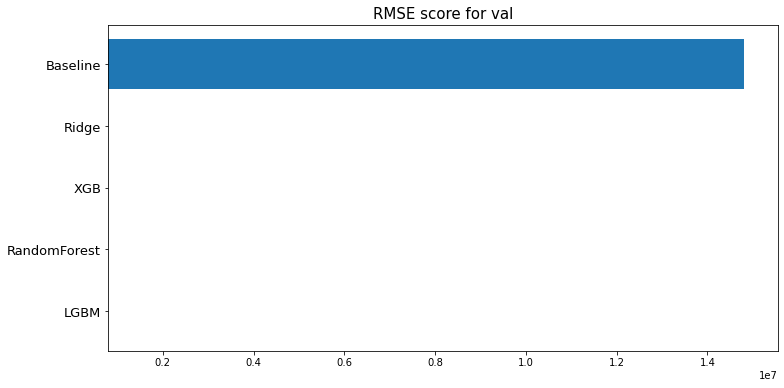

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

ax = plt.barh(y = score['Model'], width = score['RMSE'])
plt.title('RMSE score for val', size = 15)
plt.xlim([798000, None])
plt.yticks(size = 13)
plt.show()

In [ ]:
score = pd.DataFrame(np.array([['RandomForest', 'Ridge', 'XGB', 'LGBM'],
                                [798590, 798645, 798629, 798585]]), index = ['Model', 'RMSE']).T
score['RMSE'] = score['RMSE'].astype('int')
score = score.sort_values('RMSE')
score

,Model,RMSE
3,LGBM,798585
0,RandomForest,798590
2,XGB,798629
1,Ridge,798645


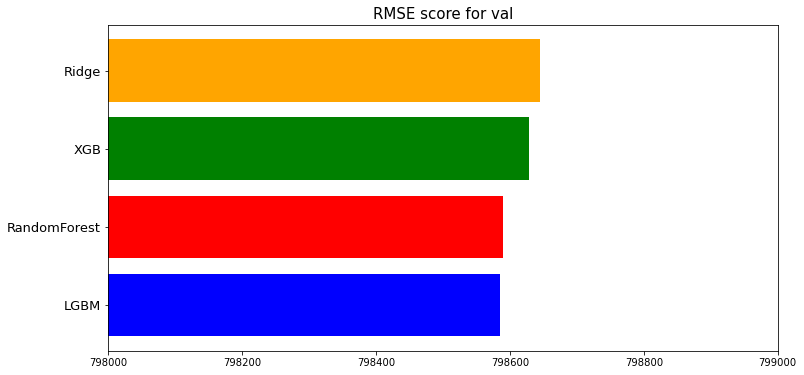

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

ax = plt.barh(y = score['Model'], width = score['RMSE'], color = ['blue', 'red', 'green', 'orange'])
plt.title('RMSE score for val', size = 15)
plt.xlim([798000, 799000])
plt.yticks(size = 13)
plt.show()

test score

In [ ]:
score = pd.DataFrame(np.array([['Baseline','RandomForest', 'Ridge', 'XGB', 'LGBM'],
                                [12658581 , 20733749, 20733706, 20733739, 20733744]]), index = ['Model', 'RMSE']).T
score['RMSE'] = score['RMSE'].astype('int')
score = score.sort_values('RMSE')
score

,Model,RMSE
0,Baseline,12658581
2,Ridge,20733706
3,XGB,20733739
4,LGBM,20733744
1,RandomForest,20733749


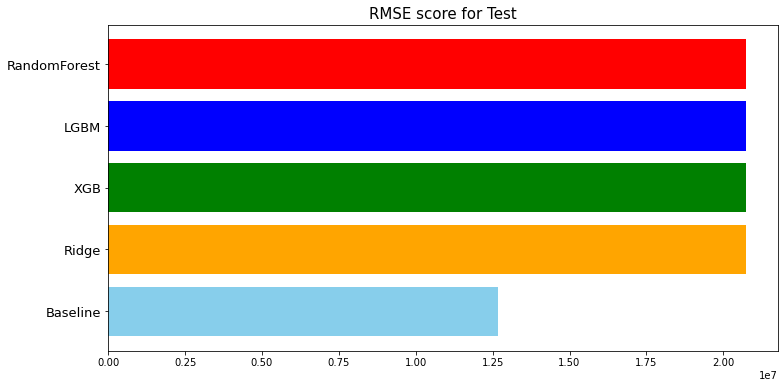

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

ax = plt.barh(y = score['Model'], width = score['RMSE'], color = ['skyblue', 'orange', 'green', 'blue', 'red'])
plt.title('RMSE score for Test', size = 15)
plt.yticks(size = 13)
plt.show()

In [ ]:
score = pd.DataFrame(np.array([['RandomForest', 'Ridge', 'XGB', 'LGBM'],
                                [20733749, 20733706, 20733739, 20733744]]), index = ['Model', 'RMSE']).T
score['RMSE'] = score['RMSE'].astype('int')
score = score.sort_values('RMSE')
score

,Model,RMSE
1,Ridge,20733706
2,XGB,20733739
3,LGBM,20733744
0,RandomForest,20733749


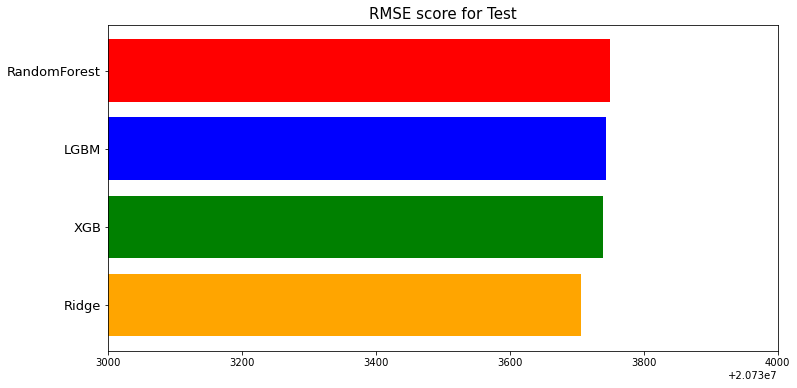

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

ax = plt.barh(y = score['Model'], width = score['RMSE'], color = ['orange', 'green', 'blue', 'red'])
plt.title('RMSE score for Test', size = 15)
plt.xlim([20733000, 20734000])
plt.yticks(size = 13)
plt.show()

### 5) SHAP, PDP 시각화

#### val dataset

In [ ]:
x_val2['manufacturer_tesla'] = 0
x_val2['manufacturer_morgan'] = 0

x_test2['manufacturer_tesla'] = 0
x_test2['manufacturer_morgan'] = 0

In [ ]:
row = x_val2.iloc[[5]]  # 중첩 brackets을 사용하면 결과물이 DataFrame입니다
row

,manufacturer_ford,manufacturer_honda,manufacturer_bmw,manufacturer_gmc,manufacturer_chevrolet,manufacturer_dodge,manufacturer_subaru,manufacturer_acura,manufacturer_hyundai,manufacturer_cadillac,...,en_manufacturer_us,en_manufacturer_jp,en_manufacturer_ger,en_manufacturer_kor,en_manufacturer_swe,en_manufacturer_uk,en_manufacturer_ita,en_cylinders,manufacturer_tesla,manufacturer_morgan
166401,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,2,0,0


In [ ]:
y_val.iloc[[5]]

166401    8995
Name: price, dtype: int64

In [ ]:
model = LGBMRegressor(learning_rate=0.370000345784152, max_depth=27, random_state=42,
              reg_alpha=0.34793901133648003, reg_lambda=0.9811770094593877, num_leaves = 2^20)
model.fit(x_train2, y_train)
model.predict(row)

array([9430.18139134])

In [ ]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row
)

In [ ]:
row = x_val2.iloc[[500]]  # 중첩 brackets을 사용하면 결과물이 DataFrame입니다
y_val.iloc[[500]]

352616    9000
Name: price, dtype: int64

In [ ]:
model.predict(row)

array([15069.25799941])

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row
)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x23fa7890a90>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x23fa78abfd0>})

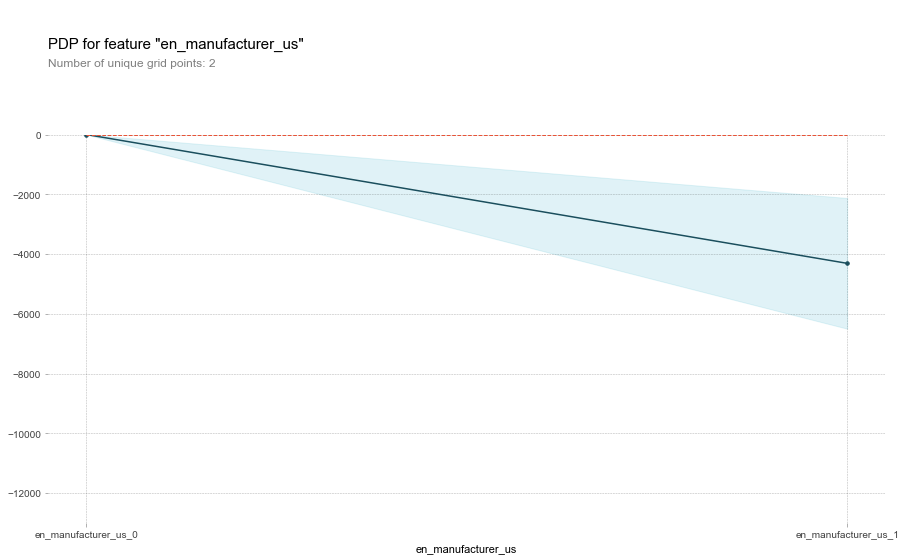

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'en_manufacturer_us'

isolated = pdp_isolate(
    model=model, 
    dataset=x_val2, 
    model_features=x_val2.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x23fa91810d0>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x23faaa59e80>})

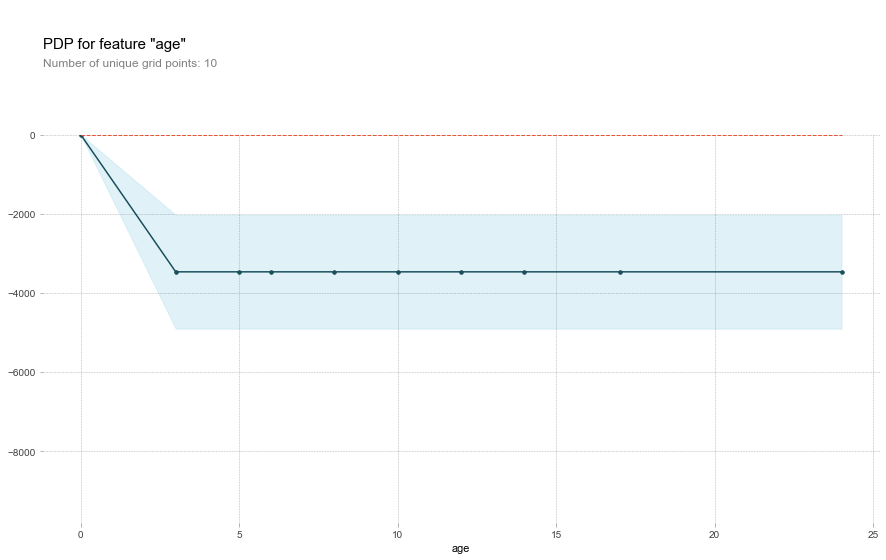

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'age'

isolated = pdp_isolate(
    model=model, 
    dataset=x_val2, 
    model_features=x_val2.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x23faf4ae9d0>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x23fac313c70>})

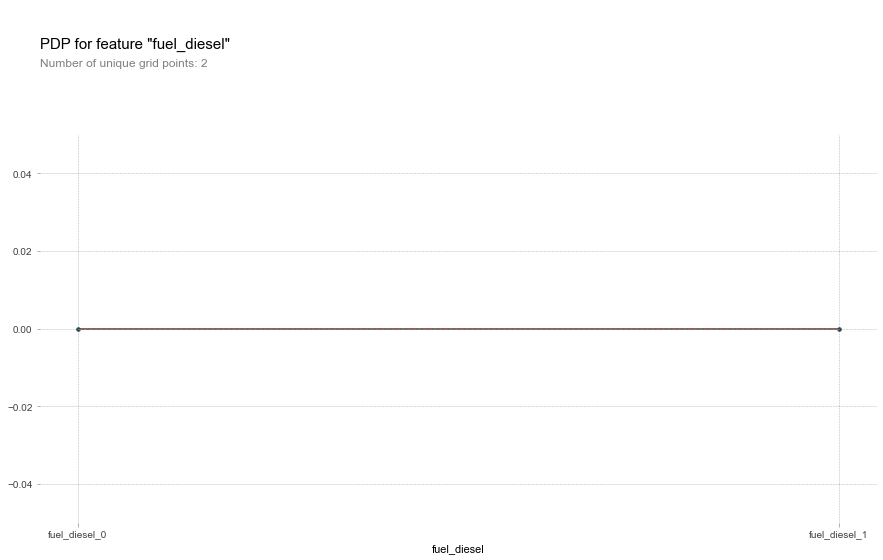

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'fuel_diesel'

isolated = pdp_isolate(
    model=model, 
    dataset=x_val2, 
    model_features=x_val2.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature)

#### test dataset

In [ ]:
row = x_test2.iloc[[500]]  # 중첩 brackets을 사용하면 결과물이 DataFrame입니다
y_test.iloc[[500]]

238909    11500
Name: price, dtype: int64

In [ ]:
model = LGBMRegressor(learning_rate=0.370000345784152, max_depth=27, random_state=42,
              reg_alpha=0.34793901133648003, reg_lambda=0.9811770094593877, num_leaves = 2^20)
model.fit(x_train2, y_train)
model.predict(row)

array([17403.16136695])

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row
)

In [ ]:
row = x_test2.iloc[[8000]]  # 중첩 brackets을 사용하면 결과물이 DataFrame입니다
y_test.iloc[[8000]]

95342    5900
Name: price, dtype: int64

In [ ]:
model = LGBMRegressor(learning_rate=0.370000345784152, max_depth=27, random_state=42,
              reg_alpha=0.34793901133648003, reg_lambda=0.9811770094593877, num_leaves = 2^20)
model.fit(x_train2, y_train)
model.predict(row)

array([16885.86291016])

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row
)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x23f51bf2d90>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x23f514a2ee0>})

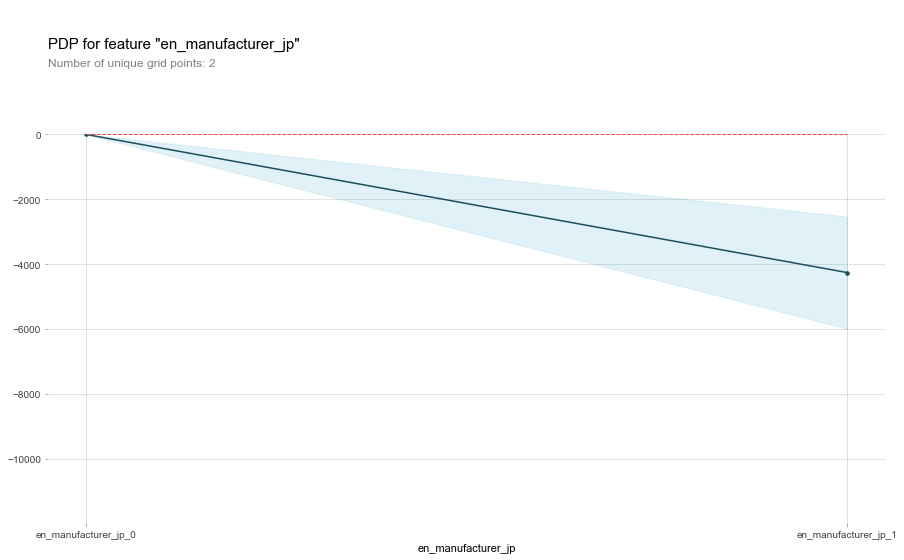

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'en_manufacturer_jp'

isolated = pdp_isolate(
    model=model, 
    dataset=x_test2, 
    model_features=x_test2.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature)

- 제조사의 국가가 jp면 price가 떨어지는 것으로 보인다.

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x23fa475afa0>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x23f52454580>})

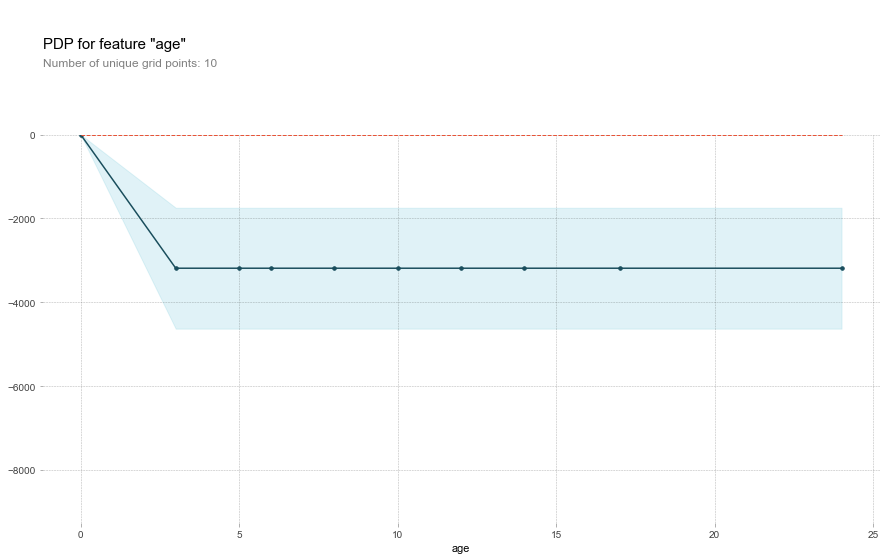

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'age'

isolated = pdp_isolate(
    model=model, 
    dataset=x_test2, 
    model_features=x_test2.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10
)
pdp_plot(isolated, feature_name=feature)

- age는 어느 정도까지는 price에 급격한 영향을 주지만, 그 이후로는 늘어나도 영향이 크게 없는 것으로 보인다.

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x23fa5fe0220>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x23fa5fc13a0>})

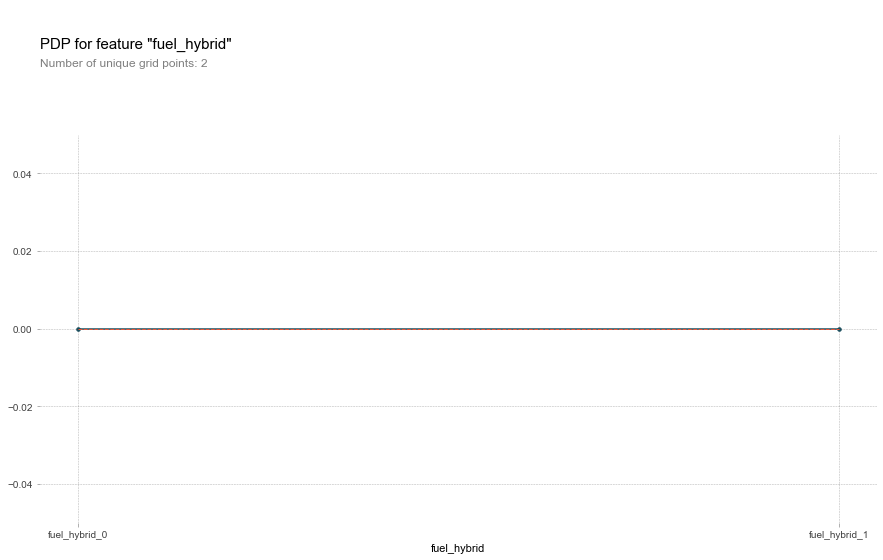

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'fuel_hybrid'

isolated = pdp_isolate(
    model=model, 
    dataset=x_test2, 
    model_features=x_test2.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature)

- price를 낮추는 쪽으로 영향을 보였던 fuel_hybrid feature는 영향력이 없는 것으로 보인다.

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x23f524174f0>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x23f524b4970>})

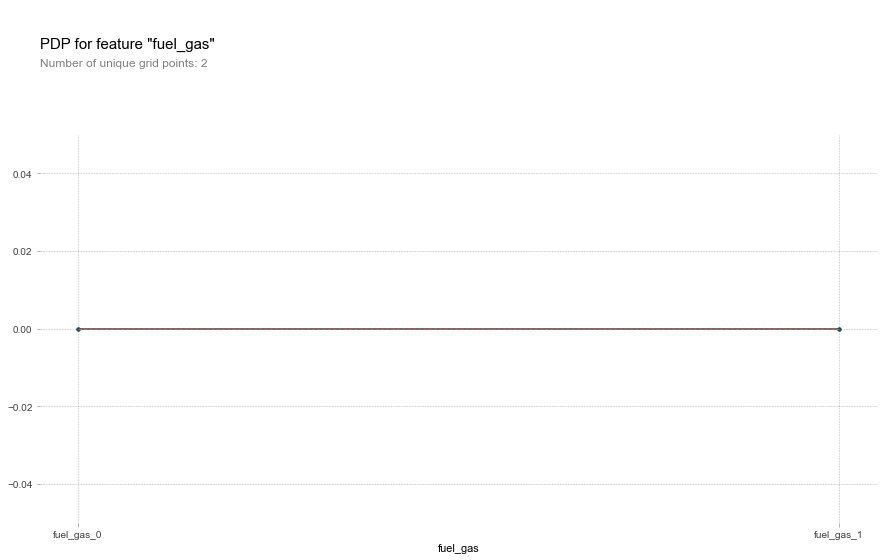

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'fuel_gas'

isolated = pdp_isolate(
    model=model, 
    dataset=x_test2, 
    model_features=x_test2.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature)

- fuel_gas 또한 마찬가지

### 평가

- nan 값들을 결측치 처리 해주지 않고, 어느정도 drop 시켰을 경우 성능이 최종 모델보다 훨씬 좋게 나왔다.
- 하지만, nan 값들을 모두 최빈값(범주형) 또는 median(수치형)으로 채우고 drop시키지 않았을 경우 성능이 좋지 않았다.
- 따라서 결측치의 영향을 많이 받는다고 할 수 있다.


- 또한, 차량이라는 특성상 모델에 따라, 년식, 주행거리 등에 따라 가격 차이가 많이 날 수 있기 때문에 이상치인지 실제 값인지 판단하기가 쉽지 않고, 일반화 되기 어렵기 때문에 성능이 좋지 않게 나온다고 생각한다.